This Jupyter notebook goes through how the simulated Pyrene and DMA ESR spectrums were made. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

For frequency $\nu=10^7Hz$, where the intersection point for the g value of a free electron ($g_e\approx 2$) and $g=\frac{h\nu}{uB}$. 

In [161]:
u = 9.2740100783*10**(-24) # u
h = 6.62607004*10**(-34) # plank constant [Js]
v = 2*10**8 # frequency [Hz]

In [9]:
def g(B, v): return h*v/(u*B)

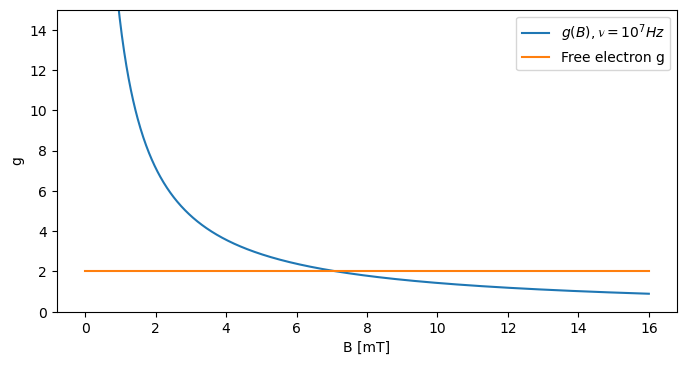

In [10]:
B = np.linspace(0.000001, 0.016, 1000) # magnetic field strength
plt.subplots(figsize=(8,4), dpi=100)                                                     
plt.plot(B*1000,g(B, v), label="$g(B),  𝜈=10^7 Hz$")
plt.plot(B*1000, [2.00231929 for i in range(len(B))], label="Free electron g")
plt.xlabel("B [mT]")
plt.ylim(0, 15)
plt.ylabel("g")
plt.legend()
#plt.savefig("g-B")

The point of intersection is when $g=2=\frac{h\nu}{uB}$ so $B(g=2)=\frac{h\nu}{2u}$

In [11]:
B0 = h*v/(2*u)*1000
print("The magnetic field strength where g(B0)=2 is B0 =",B0,"mT")

The magnetic field strength where g(B0)=2 is B0 = 7.144773387193269 mT


Text(0.5, 1.0, 'The magnetci field value at g=2 spectral line as a function of frequency')

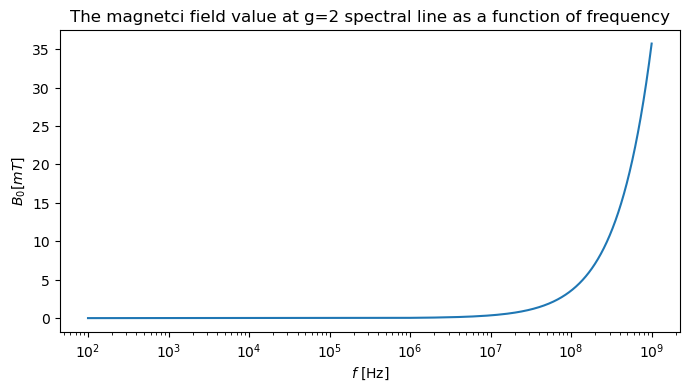

In [173]:
v = np.linspace(10**2, 10**9, 1000)
plt.subplots(figsize=(8,4), dpi=100)                                                     
plt.plot(v, h*v/(2*u)*1000)
plt.xlabel("$f$ [Hz]")
plt.ylabel("$B_0 [mT]$")
plt.xscale("log")
plt.title("The magnetci field value at g=2 spectral line as a function of frequency")

The number of spectral line for N equivlent nuclei with spin I is $2NI+1$ and multiple sets of equivlent nuclei is $\Pi_i (2N_iI_i+1)$

In [12]:
# N is number of atoms, I is spin of atoms 
def num_lines(N,I): return int(2*N*I+1)

For Pyrene: (4XH), (4XH), (2XH) are the equivlent nuclei each H has a spin 1/2. For DMA: (6XH), (1XN), (1XH). Where N has a nuclear spin of $I=1$

In [13]:
nPY = int(num_lines(4,1/2)*num_lines(4,1/2)*num_lines(2,1/2))
nDMA = int(num_lines(6,1/2)*num_lines(1,1)*num_lines(1,1/2))
nPYDMA = nPY+nDMA #number of lines for the pyrene DMA radical solution 

In [14]:
print("The number of Pyrene spectral lines:", nPY)
print("The number of DMA spectral lines:", nDMA)
print("The number of PY-DMA spectral lines:", nPYDMA)

The number of Pyrene spectral lines: 75
The number of DMA spectral lines: 42
The number of PY-DMA spectral lines: 117


In [15]:
# Pascal triangle for half integer spin 
def pascal_half(row, index):
    triangle = [[1],
                [1,1],
                [1,2,1],
                [1,3,3,1],
                [1,4,6,4,1],
                [1,5,10,10,5,1],
                [1,6,15,20,15,6,1],
                [1,7,21,35,35,21,7,1],
                [1,8,28,56,70,56,28,8,1]]
    return triangle[row][index]
# "pascal" trinagle for whole integer spin
def pascal_int(row, index): 
    triangle = [[1],
                [1,1,1],
                [1,2,3,2,1],
                [1,3,6,7,6,3,1],
                [1,4,10,16,19,16,10,4,1]]
    return triangle[row][index]

In [62]:
#hyperfine arrays from [https://pubs.acs.org/doi/pdf/10.1021/ja068209l]
NPY = [num_lines(4,1/2), num_lines(4,1/2), num_lines(2,1/2)]
NDMA = [num_lines(6,1/2),num_lines(1,1),num_lines(1,1/2)]
print("The spectral line set for pyrene:",NPY)
print("The spectral line set for DMA:",NDMA)
# hyperfine constants [mT]
aDMA = [1.180, 1.100, 0.520] 
aPY = [0.481, 0.212, 0.103]

The spectral line set for pyrene: [5, 5, 3]
The spectral line set for DMA: [7, 3, 2]


The spectral configuration then for pyrene is a quintent quintent triplet (ppt) and DMA has a septlet triplet doublet (std) 

The spectral lines are first derivative of a guassian $f(x)=-A(x-\mu)e^{-(x-\mu)^2/\sigma^2}$ Where $\mu$ is the mean of the line and $\sigma$ is the standard deviation. 

In [17]:
# spectral line 
def f(x, A, s,u): return -A*(x-u)*np.exp(-(x-u)**2/s**2)

Simulating 1 set of equivlent atoms. The spacing of the lines is given as $B_k= B_0 - aM_k$ where $M = -I, -I+1, ... ,I-1, I$ and $I=NS$ where n is the number of equivlent nuclei and S is the spin. 

In [18]:
def ESR_eq(x, I, n, B0, a):
    # convert magnetic fields to Tesla from mT
    N = num_lines(n,I)
    a /= 1000
    B0 /= 1000
    B = np.zeros(N)
    M = np.zeros(N)
    for k in range (N): 
        M[k] = -I*n+k
    for i in range (N): 
        B[i] = B0+a*M[i] # calculate B based on spin I
    fit = np.zeros(len(x))
    s = 0.25/1000 # standard deviation
    for j in range (N):
        A = 1000
        if I == 1/2: A *= pascal_half(int((N-1)/(2*I)), j)
        elif I == 1: A *= pascal_int(int((N-1)/(2*I)), j)
        fit += f(x,A,s, B[j])
    return fit

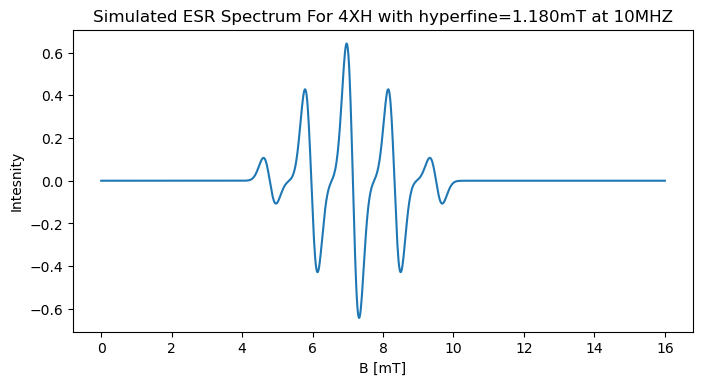

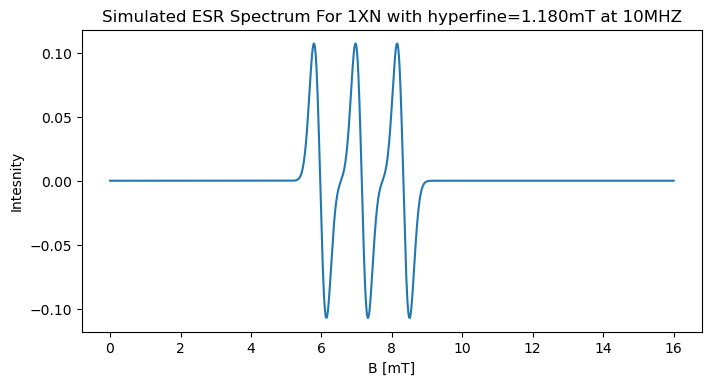

In [19]:
nH = 4 #4 equivlent H
IH = 1/2
plt.subplots(figsize=(8,4), dpi=100)
plt.plot(B*1000, ESR_eq(B, IH, nH, B0, 1.180))
plt.xlabel("B [mT]")
plt.ylabel("Intesnity")
plt.title("Simulated ESR Spectrum For 4XH with hyperfine=1.180mT at 10MHZ")
plt.show()
nN = 1 # 1 N14 atom
IN = 1 #N14 has spin 1
plt.subplots(figsize=(8,4), dpi=100)
plt.plot(B*1000, ESR_eq(B, IN, nN, B0, 1.180))
plt.xlabel("B [mT]")
plt.ylabel("Intesnity")
plt.title("Simulated ESR Spectrum For 1XN with hyperfine=1.180mT at 10MHZ")
plt.show()

Now the entire ESR spectrum can be simulated by modifing the seperation equation to be $B_k= B_0 - a_iM_{ki}$, here we use einstein summation. For the matrix $M_{ki}=-I_i, -I_i+1, ... ,I_i-1, I_i$, for each equivlent nuclei set. Each based around a new initial field strength $a_0'=a_0+a_s(X_i+Y_j)$

In [164]:
def Py_sim(x, B0, a):
    # scaling values
    B0 /= 1000
    for l in range (len(a)): a[l] /= 1000
    # finding the quintuplet1 (4XH) spacing
    B_quintuplet1 = [-2*a[0],-a[0],0,a[0],2*a[0]]
    A_quintuplet1 = [pascal_half(4, 0), pascal_half(4, 1), pascal_half(4, 2), pascal_half(4, 3),  pascal_half(4, 4)]
    # finding the quintuplet2 (4XH) spacing
    B_quintuplet2 = [-2*a[1],-a[1],0,a[1],2*a[1]]
    A_quintuplet2 = [pascal_half(4, 0), pascal_half(4, 1), pascal_half(4, 2), pascal_half(4, 3),  pascal_half(4, 4)]
    
    # finding the triplet spacing and amplitude
    B_triplet = [-a[2],0,a[2]]
    A_triplet = [pascal_half(2, 0), pascal_half(2, 1), pascal_half(2, 2)]
    
    #Constructing the spectrum
    s = 0.025/1000 # standard deviation
    fit = np.zeros(len(x)) # returned spectrum
    scale = 1000 #scaling the spectrum to some arbitrary value
    A = 0
    for i in range (len(B_quintuplet1)):
        for j in range (len(B_quintuplet2)): 
            for k in range (len(B_triplet)): 
                A = scale*A_quintuplet1[i]*A_quintuplet2[j]*A_triplet[k] # creating scale
                fit += f(x,A,s,B0+B_quintuplet1[i]+B_quintuplet2[j]+B_triplet[k])
    return fit
def DMA_sim(x, B0, a):
    # scaling values
    B0 /= 1000
    for l in range (len(a)): a[l] /= 1000
    # finding the septlet (6XH) spacing
    B_septlet = [-3*a[0],-2*a[0],-a[0],0,a[0],2*a[0], 3*a[0]]
    A_septlet = [pascal_half(6, 0), pascal_half(6, 1), pascal_half(6, 2), 
                 pascal_half(6, 3),  pascal_half(6, 4),pascal_half(6, 5),pascal_half(6, 6)]
    # finding the triplet (1XN) spacing
    B_triplet = [-a[1],0,a[1]]
    A_triplet = [1,1,1]
    # finding the doublet (1XH) spacing and amplitude
    B_doublet = [-a[2],a[2]]
    A_doublet = [pascal_half(1, 0), pascal_half(1, 1)]
    #Constructing the spectrum
    s = 0.025/1000 # standard deviation
    fit = np.zeros(len(x)) # returned spectrum
    scale = 1000 #scaling the spectrum to some arbitrary value
    A = 0
    for i in range (len(B_septlet)):
        for j in range (len(B_triplet)): 
            for k in range (len(B_doublet)): 
                A = scale*A_septlet[i]*A_triplet[j]*A_doublet[k] # creating scale
                fit += f(x,A,s,B0+B_septlet[i]+B_triplet[j]+B_doublet[k])
    
    return fit

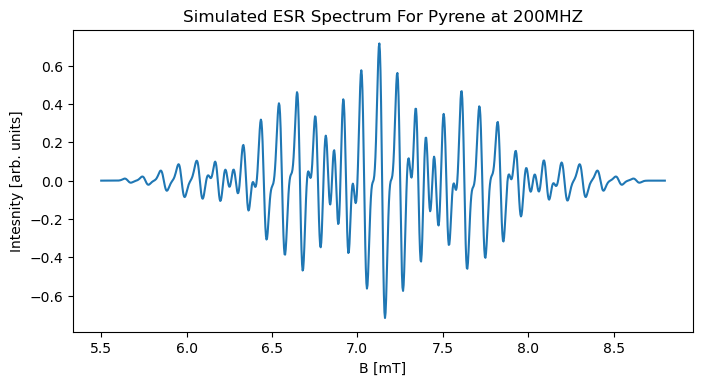

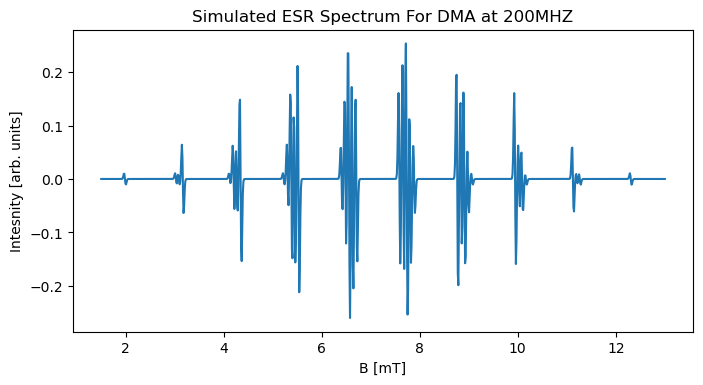

In [174]:
v = 2*10**8 # frequency [Hz]
B = np.linspace(5.5/1000, 8.8/1000, 1000) # magnetic field strength
aPY = [0.481, 0.212, 0.103] # coupling constants
plt.subplots(figsize=(8,4), dpi=100)
plt.plot(B*1000,Py_sim(B, B0, aPY))
plt.xlabel("B [mT]")
plt.ylabel("Intesnity [arb. units]")
plt.title("Simulated ESR Spectrum For Pyrene at "+str(int(v/10**6))+"MHZ")
plt.show()
B = np.linspace(1.5/1000, 13/1000, 1000) # magnetic field strength
aDMA = [1.180, 1.100, 0.520] 
plt.subplots(figsize=(8,4), dpi=100)
plt.plot(B*1000,DMA_sim(B, B0, aDMA))
plt.xlabel("B [mT]")
plt.ylabel("Intesnity [arb. units]")
plt.title("Simulated ESR Spectrum For DMA at "+str(int(v/10**6))+"MHZ")
plt.show()

Since the free radicals are created throught the interaction between the two molecules then the ESR spectrum we will observse will be a superposition of the two plots above. 

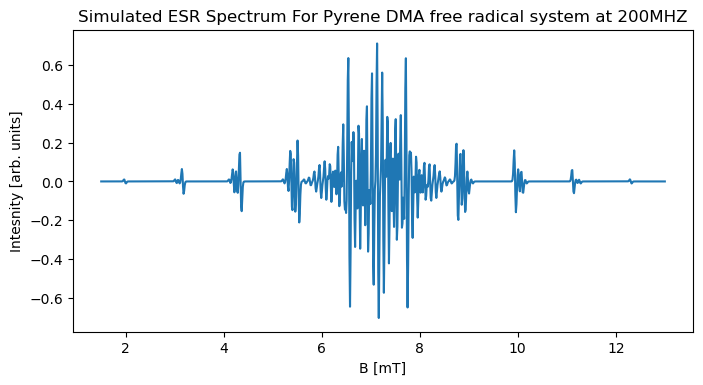

In [166]:
B = np.linspace(1.5/1000, 13/1000, 1000) # magnetic field strength
aPY = [0.481, 0.212, 0.103] # coupling constants
aDMA = [1.180, 1.100, 0.520] 
plt.subplots(figsize=(8,4), dpi=100)
plt.plot(B*1000,DMA_sim(B, B0, aDMA)+Py_sim(B, B0, aPY))
plt.xlabel("B [mT]")
plt.ylabel("Intesnity [arb. units]")
plt.title("Simulated ESR Spectrum For Pyrene DMA free radical system at "+str(int(v/10**6))+"MHZ")
plt.show()